# Logistic Regression

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
from matplotlib.patches import FancyArrowPatch
from ipywidgets import Output

In [80]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5],[0.9, 1.9], [1.4,1.4], [1.9, 0.5], [3.8, 1.5], [2.5, 2.5], [1.67, 2.587]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1,0, 0, 0, 1, 1, 1])

(12,)


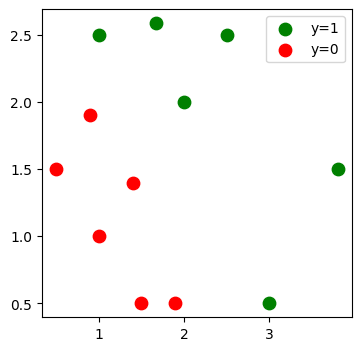

In [81]:
pos_label="y=1"
neg_label="y=0"
fig, ax = plt.subplots(1,1,figsize=(4,4))

pos = y_train == 1
neg = y_train == 0
print(pos.shape)

# Plot examples
ax.scatter(X_train[pos, 0], X_train[pos, 1], marker='o', s=80, c = 'green', label=pos_label)
ax.scatter(X_train[neg, 0], X_train[neg, 1], marker='o', s=80, label=neg_label,c = 'red')
ax.legend(loc='best' )

ax.figure.canvas.toolbar_visible = False
ax.figure.canvas.header_visible = False
ax.figure.canvas.footer_visible = False

In [82]:
def sigmoid(z):
    z = np.clip( z, -500, 500 )
    g = 1.0/(1.0+np.exp(-z))
    return g


In [83]:
def compute_cost_logistic(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)

    cost = cost / m
    return cost

In [84]:
w_tmp = np.array([1,1])
b_tmp = -3
print(compute_cost_logistic(X_train, y_train, w_tmp, b_tmp))

0.3589845249395926


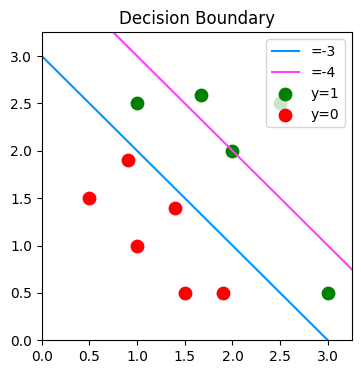

In [85]:
# Choose values between 0 and 6
x0 = np.arange(0,12)

# Plot the two decision boundaries
x1 = 3 - x0
x1_other = 4 - x0
fig,ax = plt.subplots(1, 1, figsize=(4,4))

# Plot the decision boundary
ax.plot(x0,x1, c='#0096ff', label="=-3")
ax.plot(x0,x1_other, c='#FF40FF', label="=-4")
ax.axis([0, 3.25, 0, 3.25])

# Plot the original data
ax.scatter(X_train[pos, 0], X_train[pos, 1], marker='o', s=80, c = 'green', label=pos_label)
ax.scatter(X_train[neg, 0], X_train[neg, 1], marker='o', s=80, label=neg_label,c = 'red')
ax.legend(loc='best' )

ax.figure.canvas.toolbar_visible = False
ax.figure.canvas.header_visible = False
ax.figure.canvas.footer_visible = False

ax.axis([0, 3.25, 0, 3.25])
ax.set_ylabel('', fontsize=12)
ax.set_xlabel('', fontsize=12)
plt.legend(loc="upper right")
plt.title("Decision Boundary")
plt.show()

In [86]:
w_array1 = np.array([1,1])
b_1 = -3
w_array2 = np.array([1,1])
b_2 = -4

print("Cost for b = -3 : ", compute_cost_logistic(X_train, y_train, w_array1, b_1))
print("Cost for b = -4 : ", compute_cost_logistic(X_train, y_train, w_array2, b_2))


Cost for b = -3 :  0.3589845249395926
Cost for b = -4 :  0.40497514023944187


# Gradient Descent

In [87]:
def compute_gradient_logistic(X, y, w, b):
    m,n = X.shape

    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)
        err_i  = f_wb_i  - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m
    dj_db = dj_db/m

    return dj_db, dj_dw

In [88]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):

    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i<100000:
            J_history.append( compute_cost_logistic(X, y, w, b) )

        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")

    return w, b, J_history

In [89]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters)
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.6821168967759581   
Iteration 1000: Cost 0.22110302309534222   
Iteration 2000: Cost 0.15082979171134872   
Iteration 3000: Cost 0.11943989183154215   
Iteration 4000: Cost 0.10077118867435712   
Iteration 5000: Cost 0.08805755758407174   
Iteration 6000: Cost 0.07868617530994386   
Iteration 7000: Cost 0.07141093411152176   
Iteration 8000: Cost 0.06555301135241676   
Iteration 9000: Cost 0.06070692101324839   

updated parameters: w:[5.19033121 4.71224759], b:-15.481662641440183


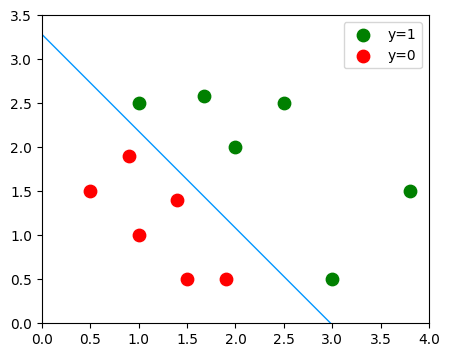

In [90]:
fig,ax = plt.subplots(1,1,figsize=(5,4))

# Plot the original data
ax.set_ylabel(r'')
ax.set_xlabel(r'')
ax.axis([0, 4, 0, 3.5])

# Plot examples
ax.scatter(X_train[pos, 0], X_train[pos, 1], marker='o', s=80, c = 'green', label=pos_label)
ax.scatter(X_train[neg, 0], X_train[neg, 1], marker='o', s=80, label=neg_label,c = 'red')
ax.legend(loc='best' )

ax.figure.canvas.toolbar_visible = False
ax.figure.canvas.header_visible = False
ax.figure.canvas.footer_visible = False

# Plot the decision boundary
x0 = -b_out/w_out[0]
x1 = -b_out/w_out[1]
ax.plot([0,x0],[x1,0], c='#0096ff', lw=1)
plt.show()